In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data\stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.shape


(1000, 8)

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [9]:
df['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [10]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
print("Categories in 'gender' variable: ", end = " ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ", end = " ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable: ", end = " ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ", end = " ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ", end = " ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['none' 'completed']


In [15]:
#Define Numerical and Categorical Features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('{} Numerical Features: {}'.format(len(num_features), num_features))

cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('{} Categorical Features: {}'.format(len(cat_features), cat_features))



3 Numerical Features: ['math_score', 'reading_score', 'writing_score']
5 Categorical Features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [16]:
##Adding Columns for total score and average
df['Total Score'] = df['math_score'] + df ['reading_score'] + df['writing_score']
df['Average'] = df['Total Score']/3

In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
math_full = df[df['math_score'] == 100]['Average'].count()
reading_full = df[df['reading_score'] == 100]['Average'].count()
writing_full = df[df['writing_score'] == 100]['Average'].count()

print(f"Number of Students with Full Marks in Maths: {math_full}")
print(f"Number of Students with Full Marks in Reading : {reading_full}")
print(f"Number of Students with Full Marks in Writing: {writing_full}")


Number of Students with Full Marks in Maths: 7
Number of Students with Full Marks in Reading : 17
Number of Students with Full Marks in Writing: 14


In [19]:
math_full = df[df['math_score'] <= 20]['Average'].count()
reading_full = df[df['reading_score'] <= 20]['Average'].count()
writing_full = df[df['writing_score'] <= 20]['Average'].count()

print(f"Number of Students with less than 20 Marks in Maths: {math_full}")
print(f"Number of Students with less than 20 Marks in Reading : {reading_full}")
print(f"Number of Students with less than 20 Marks in Writing: {writing_full}")


Number of Students with less than 20 Marks in Maths: 4
Number of Students with less than 20 Marks in Reading : 1
Number of Students with less than 20 Marks in Writing: 3


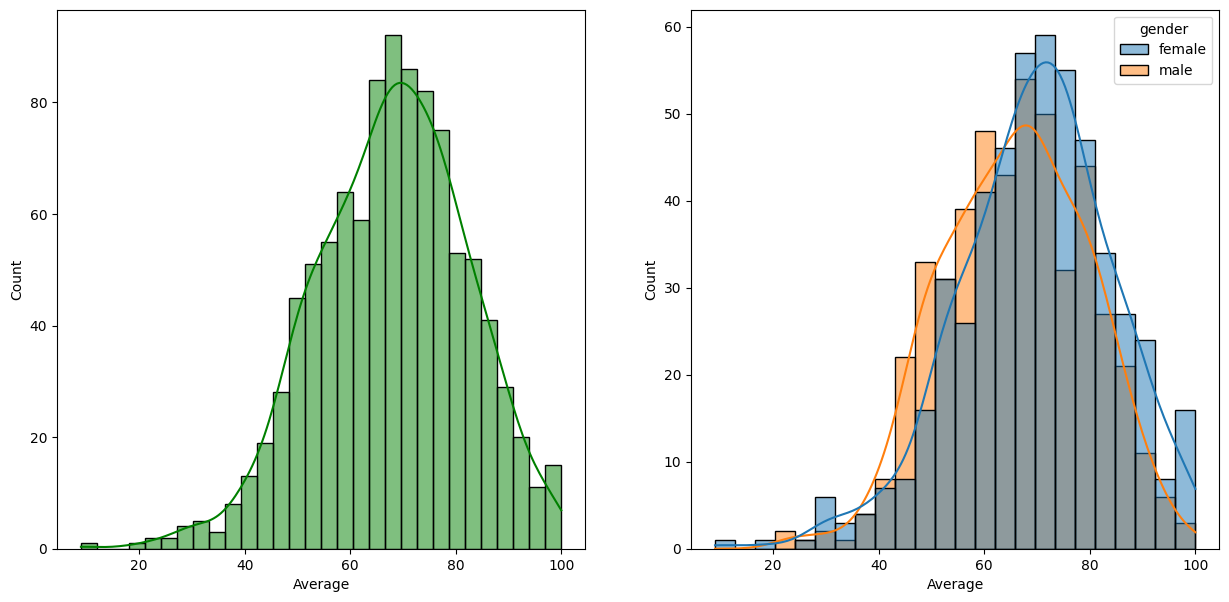

In [21]:
#Histogram and KDE

fig , axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data=df, x='Average', bins=30, kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df, x='Average',kde = True, hue = 'gender')
plt.show()

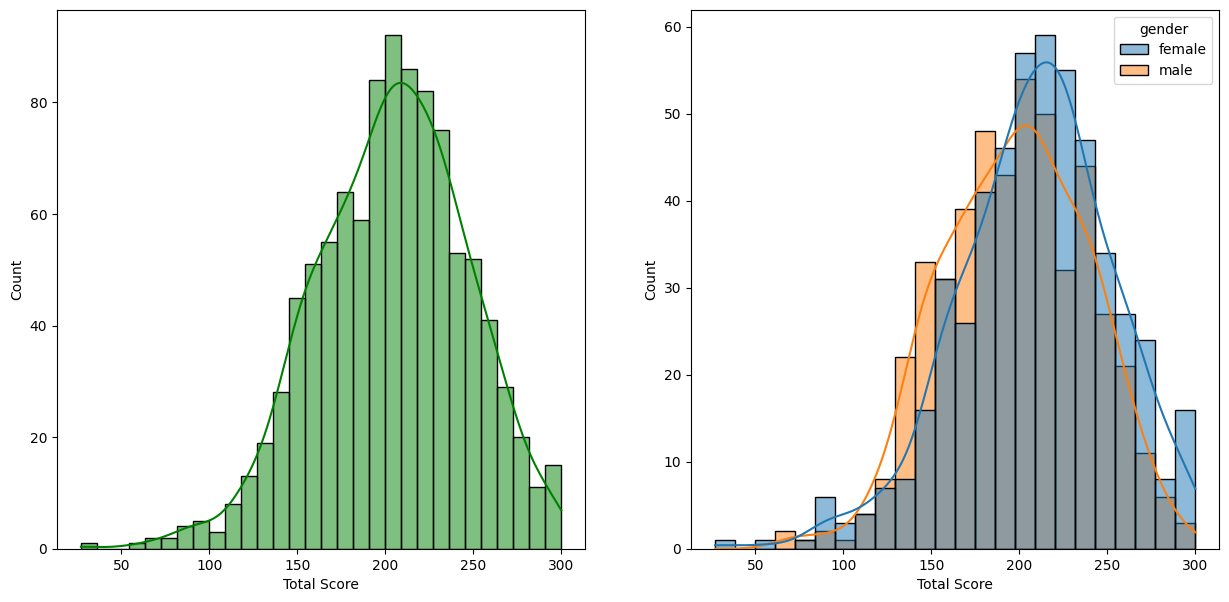

In [22]:
#Histogram and KDE

fig , axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data=df, x='Total Score', bins=30, kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df, x='Total Score',kde = True, hue = 'gender')
plt.show()

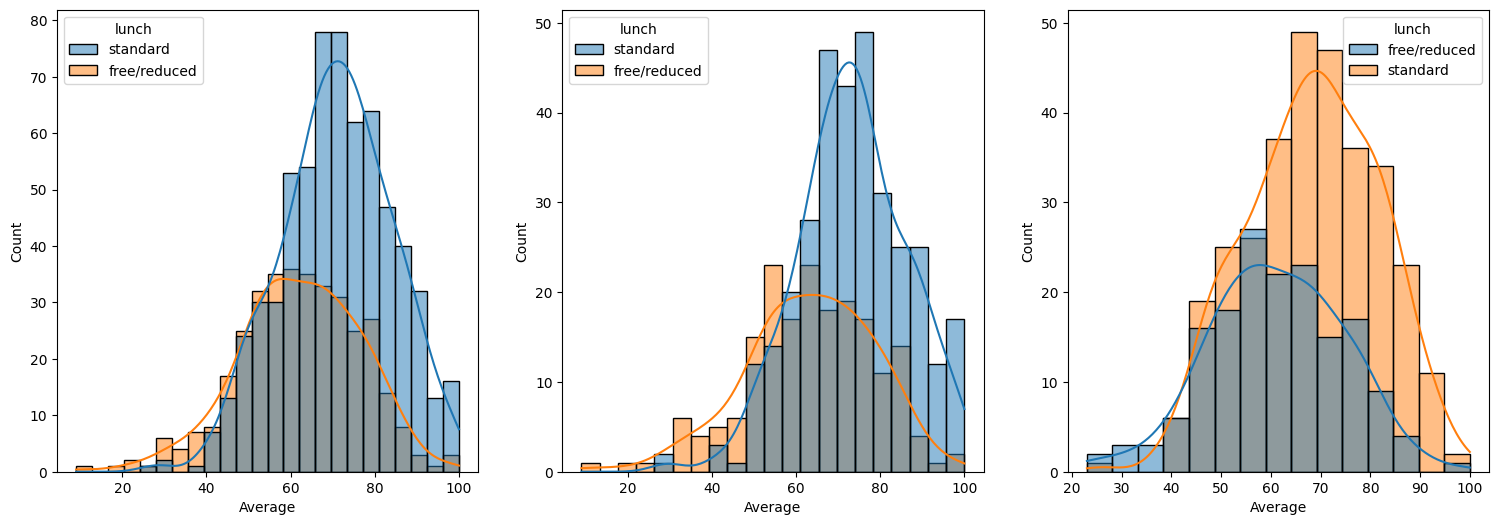

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average' ,kde=True, hue='lunch')
plt.show()
##Insights
##Standard lunch helps perform well in exams.
##Standard lunch helps perform well in exams be it a male or a female.

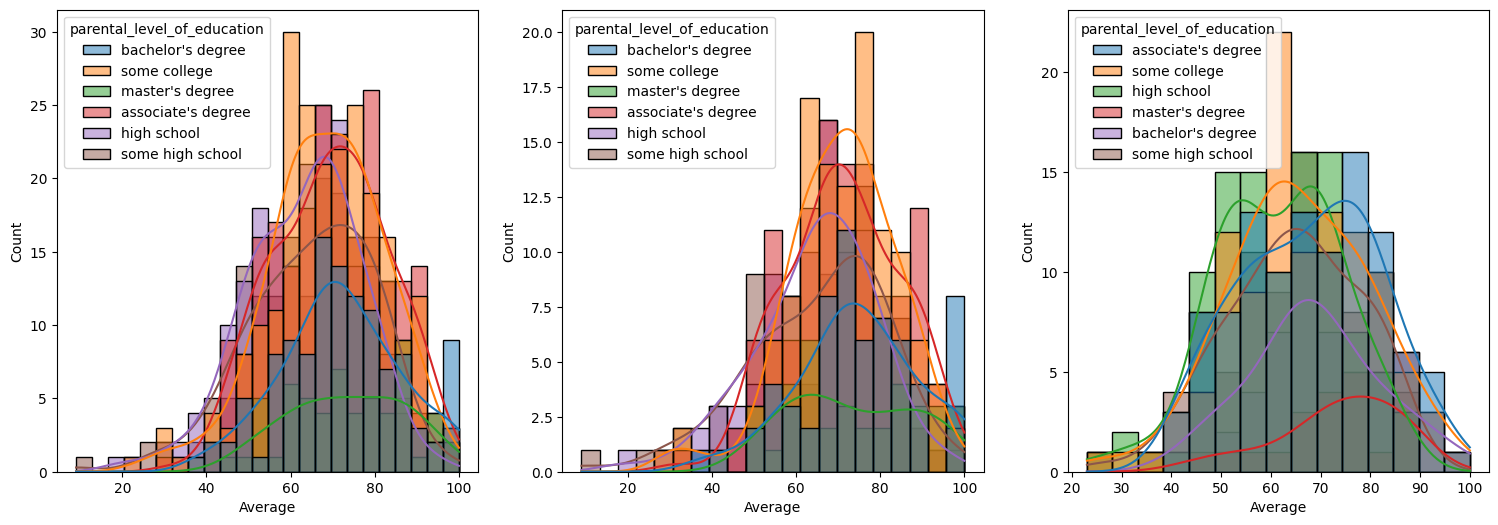

In [32]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax = sns.histplot(data=df,x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender=='male'],x='Average' ,kde=True, hue='parental_level_of_education')
plt.show()

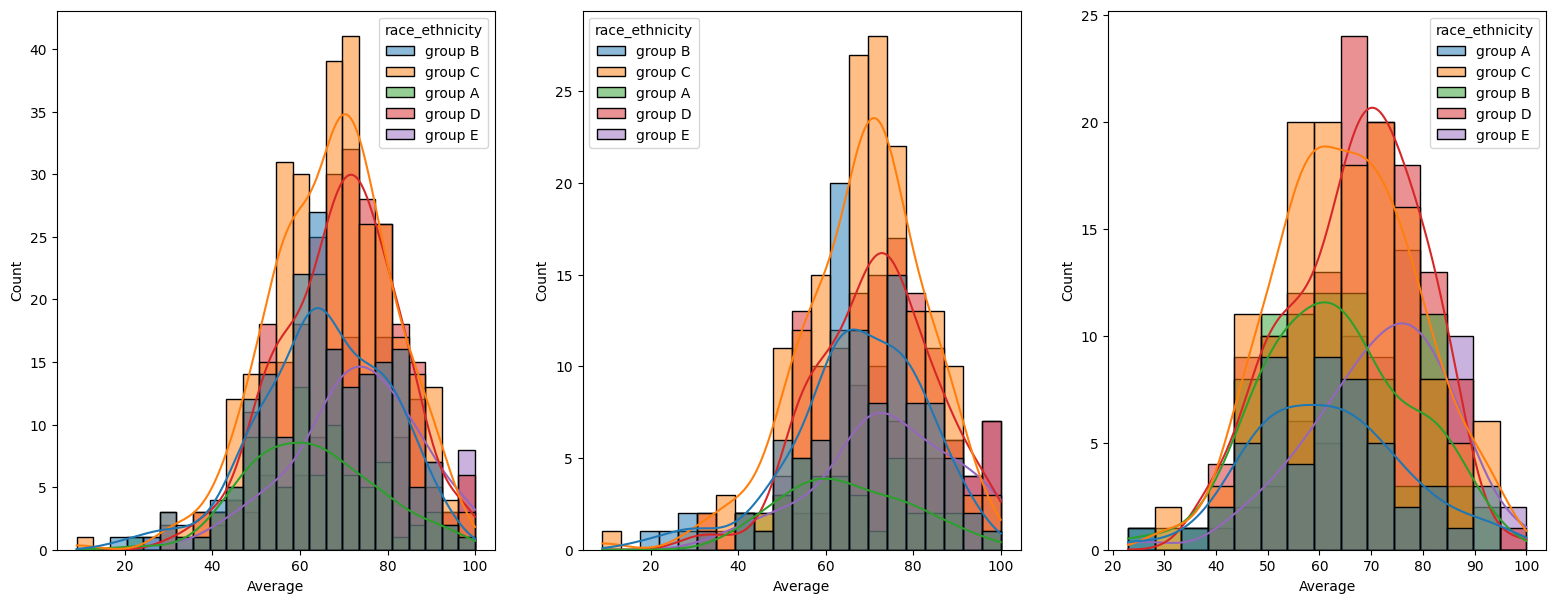

In [34]:
plt.subplots(1, 3, figsize=(26,7))
plt.subplot(141)
sns.histplot(data = df, x = 'Average', kde = True, hue = 'race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='Average', kde = True, hue = 'race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='Average', kde = True, hue = 'race_ethnicity')
plt.show()

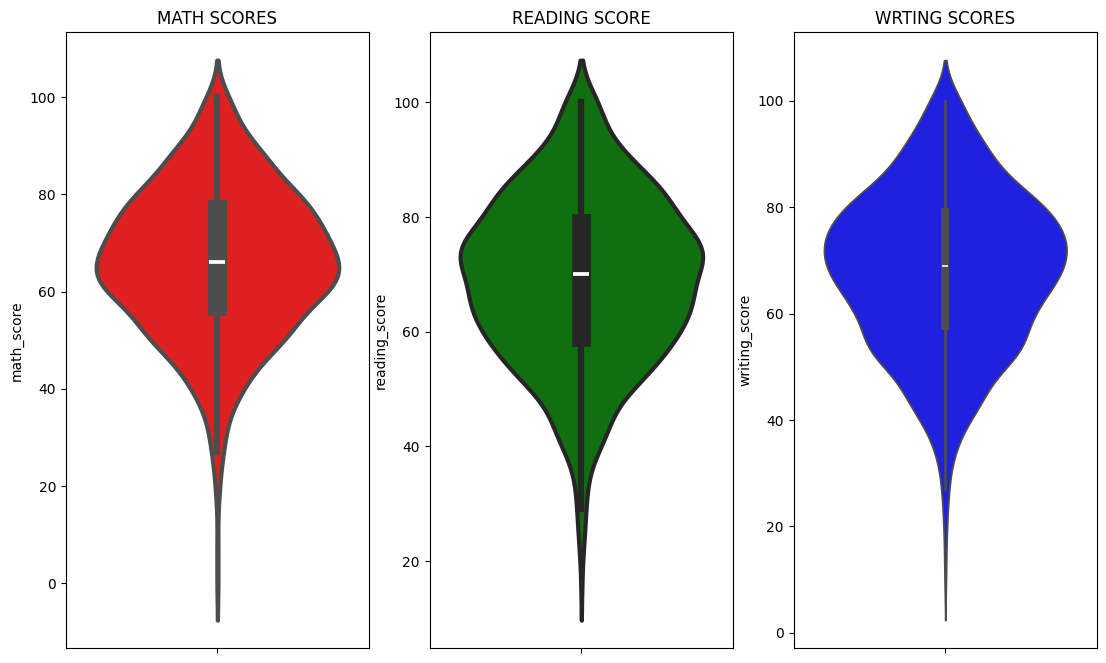

In [40]:
plt.figure(figsize=(18,8))
plt.subplot(1 ,4 ,1)
plt.title('MATH SCORES')
sns.violinplot(y = 'math_score', data = df, color = 'red', linewidth = 3)
plt.subplot(1, 4, 2)
plt.title('READING SCORE')
sns.violinplot(y = 'reading_score', data = df, color = 'green', linewidth = 3)
plt.subplot(1, 4, 3)
plt.title('WRTING SCORES')
sns.violinplot(y = 'writing_score', data = df, color = 'blue')
plt.show()

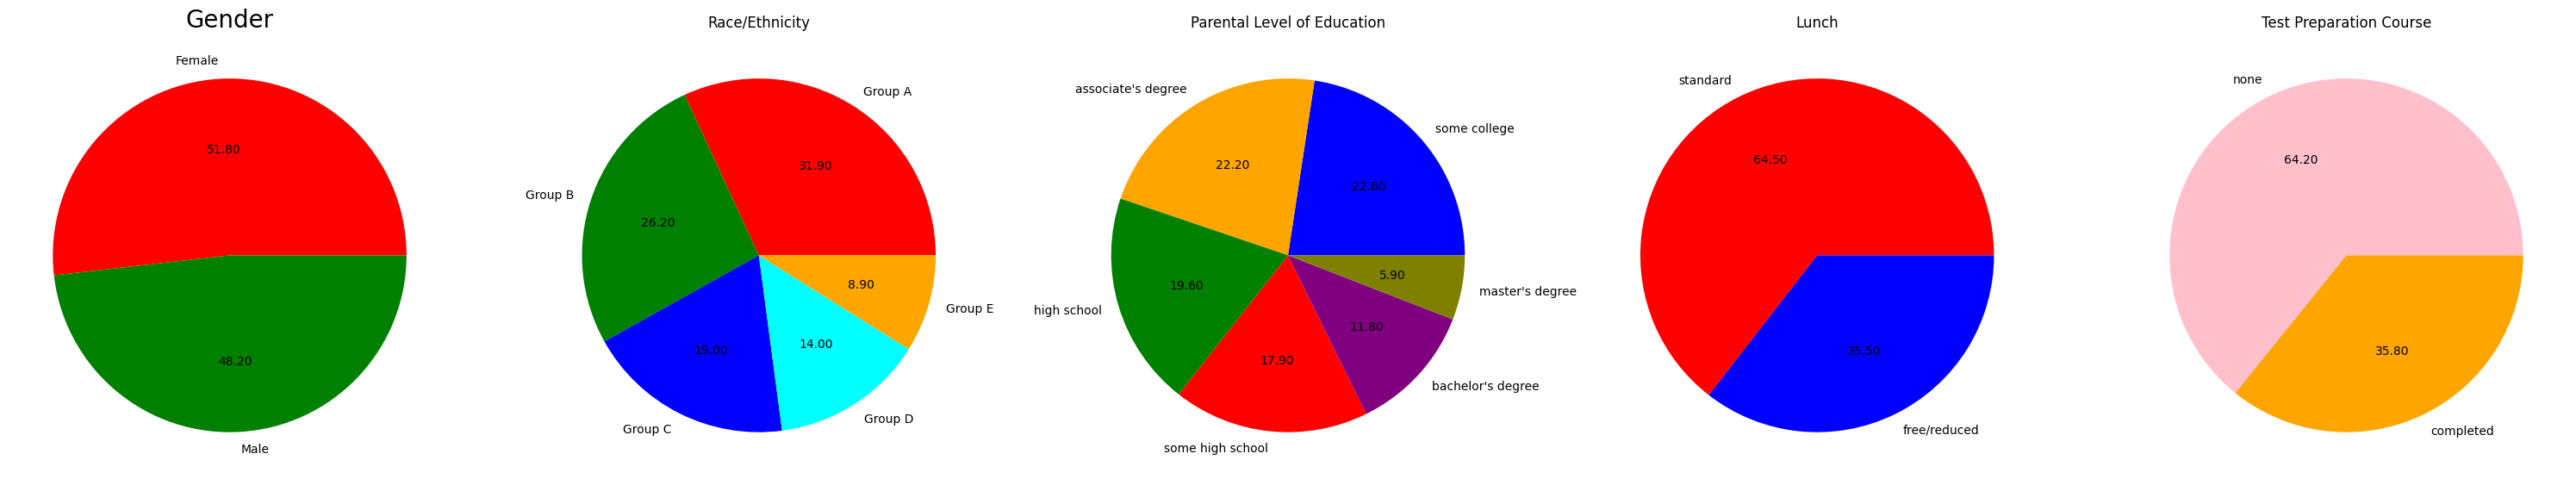

In [48]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1 ,5 ,1)
size = df['gender'].value_counts()
label = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors=color, labels=label, autopct='%.2f')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
label = 'Group A', 'Group B', 'Group C', 'Group D', 'Group E'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, labels=label, colors=color, autopct='%.2f')
plt.title('Race/Ethnicity')
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['parental_level_of_education'].value_counts()
label = "some college", "associate's degree", "high school", "some high school", "bachelor's degree", "master's degree"
color = ['blue','orange','green','red','purple','olive']

plt.pie(size, labels=label, colors=color, autopct='%.2f')
plt.title('Parental Level of Education')
plt.axis('off')

plt.subplot(1 ,5 ,4)
size = df['lunch'].value_counts()
label = 'standard', 'free/reduced'
color = ['red', 'blue']

plt.pie(size, labels=label, colors=color, autopct='%.2f')
plt.title('Lunch')
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['test_preparation_course'].value_counts()
label = ['none','completed']
color = ['pink', 'orange']

plt.pie(size, labels=label, colors=color, autopct='%.2f')
plt.title('Test Preparation Course')
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

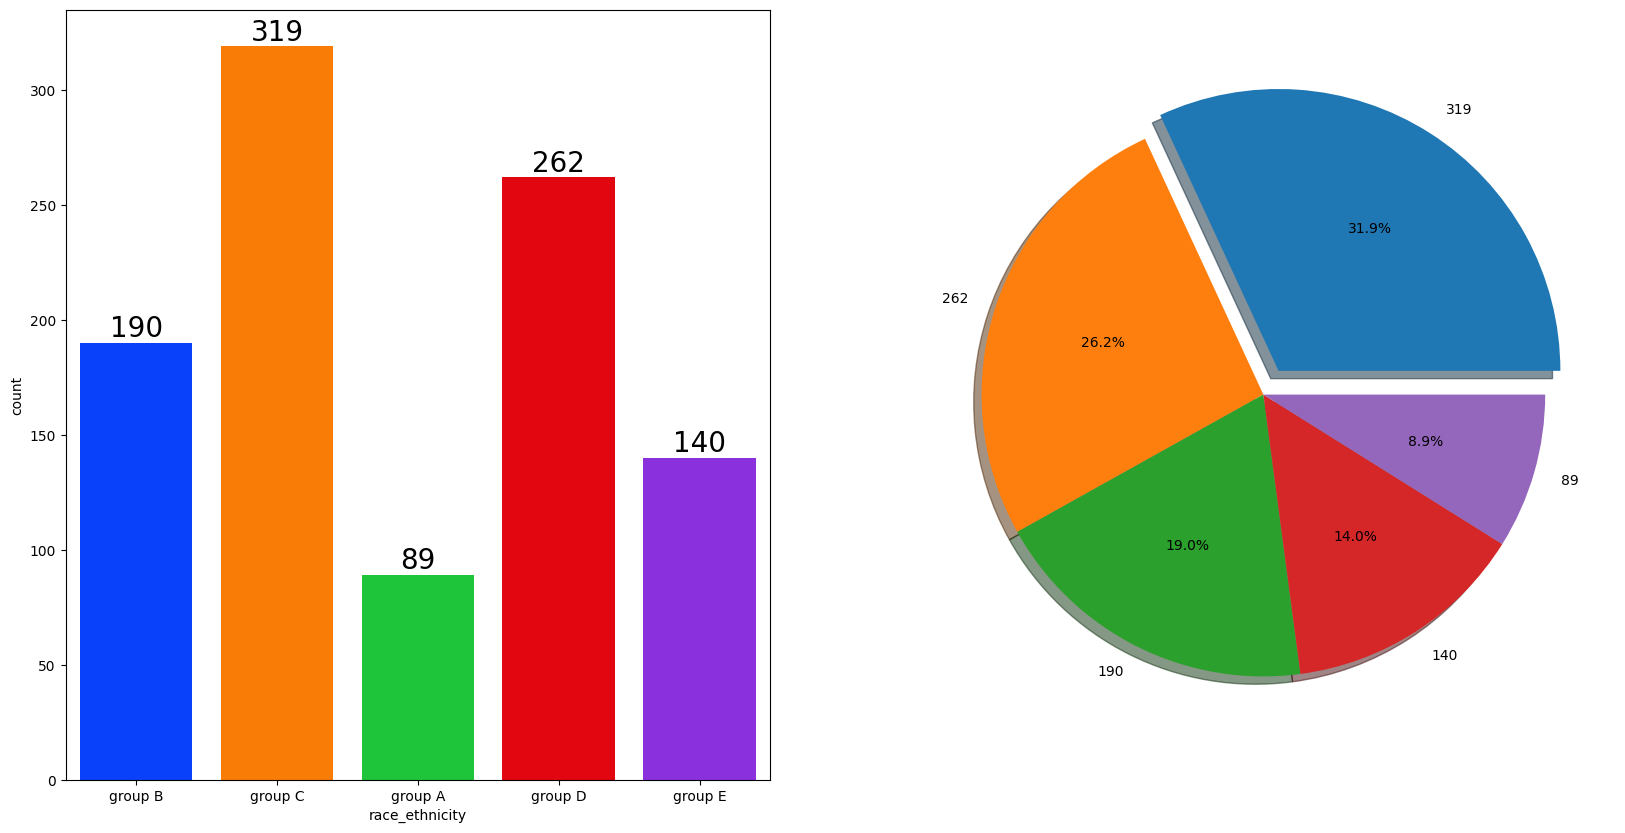

In [49]:
f,ax = plt.subplots(1 ,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data =df, palette='bright', ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)

plt.pie(x=df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts(), explode=[0.1,0,0,0,0], autopct = '%1.1f%%', shadow = True)
plt.show()